## Neural network - basic behavior

Laurent Cetinsoy - Datadidacte - personal use only

In order to get a bit of understanding and practice with keras we are going to test a few different architectures

## Effect of the activation function

Load the fashion mnist dataset from the tensorflow.keras.datasets module 

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

data = load_data()
train, test = data

4431872/4422102 [==============================] - 0s 0us/step


Display the first image of the train dataset with matplotlib

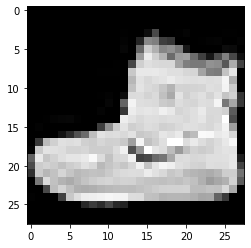

In [ ]:
import matplotlib.pyplot as plt

X_train, y_train = train
plt.imshow(X_train[0], cmap='gray')

In [ ]:
X_train.shape

(60000, 28, 28)

Display the number of classes in the dataset

In [ ]:
import numpy as np
X_test, y_test = test
class_values = np.unique(data[0][1]) # or else len(set(y_train))
class_count = len(np.array(class_values))
class_count, class_values

(10, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Create a simple neural network with the following structure : 

- One dense layer with **sigmoid** activation and 300 neurones
- One dense layer with **sigmoid** activation and 100 neurones 
- One dense layer with softmax activation. How many neurones should there be ? 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
images_count, image_height, image_width = X_train.shape

In [ ]:
sigmoid_model = Sequential()
sigmoid_model.add(Dense(units=300, activation='sigmoid', input_shape=[image_height*image_width]))
sigmoid_model.add(Dense(units=100, activation='sigmoid'))
sigmoid_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

Compile the model with the sgd optimizer and the sparse_categorical_crossentropy_loss

In [ ]:
sigmoid_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

Reshape the images so that each image is a vector. Remember to normalize the dataset by doing a min-max scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = X_train.reshape(-1, image_height*image_width)
X_train = scaler.fit_transform(X_train) # or X_train / 255 as min = 0 and max = 255 (RGB colors)

Train the model for 10 epochs and display the loss versus the number of epochs. For that you can use Keras callbacks : https://keras.io/api/callbacks/

Does it train well ? 

In [ ]:
import tensorflow as tf

class LogCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('\n\nTrain Loss = {}\nValidation Loss = {}\nEpoch =  {}\n'.format(logs['loss'], logs['val_loss'], epoch))

In [ ]:
sigmoid_model_history = sigmoid_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
sigmoid_model_history

Epoch 1/10
1306/1313 [============================>.] - ETA: 0s - loss: 2.0468 - accuracy: 0.4466

Train Loss = 2.04506516456604
Validation Loss = 1.6826527118682861
Epoch =  0

1313/1313 [==============================] - 8s 4ms/step - loss: 2.0451 - accuracy: 0.4473 - val_loss: 1.6827 - val_accuracy: 0.5763
Epoch 2/10
1302/1313 [============================>.] - ETA: 0s - loss: 1.3986 - accuracy: 0.6257

Train Loss = 1.397133708000183
Validation Loss = 1.1903831958770752
Epoch =  1

1313/1313 [==============================] - 6s 4ms/step - loss: 1.3971 - accuracy: 0.6257 - val_loss: 1.1904 - val_accuracy: 0.6424
Epoch 3/10
1307/1313 [============================>.] - ETA: 0s - loss: 1.0749 - accuracy: 0.6747

Train Loss = 1.0751514434814453
Validation Loss = 0.9765915870666504
Epoch =  2

1313/1313 [==============================] - 6s 4ms/step - loss: 1.0752 - accuracy: 0.6745 - val_loss: 0.9766 - val_accuracy: 0.7026
Epoch 4/10
1313/1313 [==============================] - ETA: 0s 

The loss did not go under 0.5 with the sigmoid activation function, however, both train and validation loss are decreasing at each epoch

Make another model by replacing this time the sigmoid activations by Relu. Train again the model and display the loss curve. Is it better ? 

In [ ]:
relu_model = Sequential()
relu_model.add(Dense(units=300, activation='relu', input_shape=[image_height*image_width]))
relu_model.add(Dense(units=100, activation='relu'))
relu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
relu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
relu_model_history = relu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
relu_model_history

Epoch 1/10
1303/1313 [============================>.] - ETA: 0s - loss: 0.7670 - accuracy: 0.7512

Train Loss = 0.7654213905334473
Validation Loss = 0.5665522813796997
Epoch =  0

1313/1313 [==============================] - 6s 5ms/step - loss: 0.7654 - accuracy: 0.7515 - val_loss: 0.5666 - val_accuracy: 0.8071
Epoch 2/10
1308/1313 [============================>.] - ETA: 0s - loss: 0.5051 - accuracy: 0.8284

Train Loss = 0.5056716799736023
Validation Loss = 0.4786461591720581
Epoch =  1

1313/1313 [==============================] - 6s 4ms/step - loss: 0.5057 - accuracy: 0.8281 - val_loss: 0.4786 - val_accuracy: 0.8312
Epoch 3/10
1309/1313 [============================>.] - ETA: 0s - loss: 0.4581 - accuracy: 0.8400

Train Loss = 0.4584905505180359
Validation Loss = 0.5035920739173889
Epoch =  2

1313/1313 [==============================] - 6s 4ms/step - loss: 0.4585 - accuracy: 0.8399 - val_loss: 0.5036 - val_accuracy: 0.8274
Epoch 4/10
1305/1313 [============================>.] - ETA: 

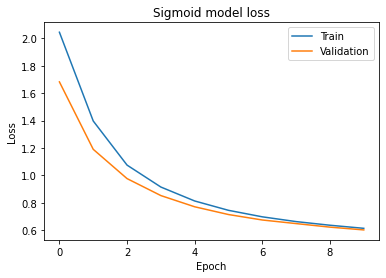

In [ ]:
plt.plot(sigmoid_model_history.history['loss'])
plt.plot(sigmoid_model_history.history['val_loss'])
plt.title('Sigmoid model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

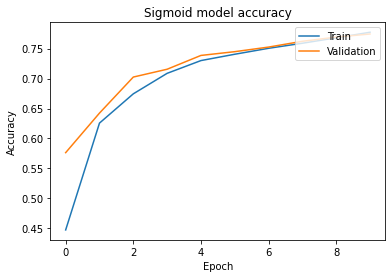

In [ ]:
plt.plot(sigmoid_model_history.history['accuracy'])
plt.plot(sigmoid_model_history.history['val_accuracy'])
plt.title('Sigmoid model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

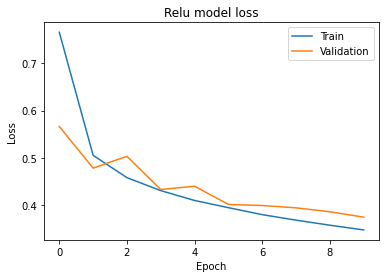

In [ ]:
plt.plot(relu_model_history.history['loss'])
plt.plot(relu_model_history.history['val_loss'])
plt.title('Relu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

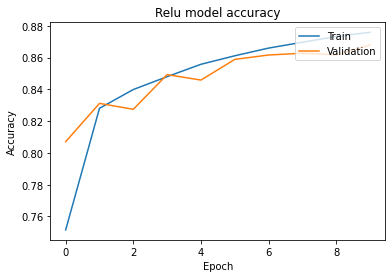

In [ ]:
plt.plot(relu_model_history.history['accuracy'])
plt.plot(relu_model_history.history['val_accuracy'])
plt.title('Relu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

For the RELu model, the loss did go under 0.5 and was globally inferior the the loss with the sigmoid activation function but we note that the validation loss increases after the 4th epoch and then is a little bit superior to the train loss until the 10th epoch, but it still does better than the model with the sigmoid activation function. Also, in terms of accuracy, the Relu model is better than the sigmoid.

Do the same with the selu function 

In [ ]:
selu_model = Sequential()
selu_model.add(Dense(units=300, activation='selu', input_shape=[image_height*image_width]))
selu_model.add(Dense(units=100, activation='selu'))
selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
selu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
selu_model_history = selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_history

Epoch 1/10
1303/1313 [============================>.] - ETA: 0s - loss: 0.6005 - accuracy: 0.7916

Train Loss = 0.5998288989067078
Validation Loss = 0.5418546795845032
Epoch =  0

1313/1313 [==============================] - 6s 5ms/step - loss: 0.5998 - accuracy: 0.7919 - val_loss: 0.5419 - val_accuracy: 0.8044
Epoch 2/10
1299/1313 [============================>.] - ETA: 0s - loss: 0.4594 - accuracy: 0.8373

Train Loss = 0.4588639736175537
Validation Loss = 0.47857341170310974
Epoch =  1

1313/1313 [==============================] - 6s 4ms/step - loss: 0.4589 - accuracy: 0.8375 - val_loss: 0.4786 - val_accuracy: 0.8278
Epoch 3/10
1300/1313 [============================>.] - ETA: 0s - loss: 0.4273 - accuracy: 0.8486

Train Loss = 0.4264531135559082
Validation Loss = 0.4446704685688019
Epoch =  2

1313/1313 [==============================] - 6s 4ms/step - loss: 0.4265 - accuracy: 0.8490 - val_loss: 0.4447 - val_accuracy: 0.8416
Epoch 4/10
1308/1313 [============================>.] - ETA:

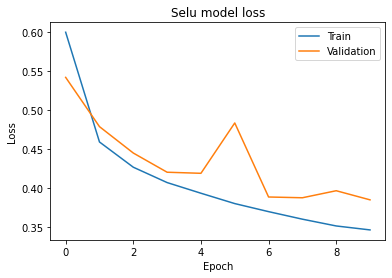

In [ ]:
plt.plot(selu_model_history.history['loss'])
plt.plot(selu_model_history.history['val_loss'])
plt.title('Selu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

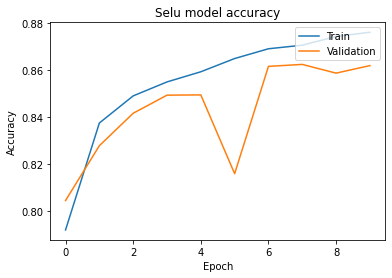

In [ ]:
plt.plot(selu_model_history.history['accuracy'])
plt.plot(selu_model_history.history['val_accuracy'])
plt.title('Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss of the model with the SeLu activation function is a bit better than the model with the ReLu activation function

## Effect of the size 

In this section we want to study the effect of the size of the network on the learning

Re-use the previous network and try to increase its size by using the following number of neurones : 

-  800 for first layer
- 500 for second layer
- same size


You might need to train the network longer, but does it reach a better performance ? 

In [ ]:
selu_model_big = Sequential()
selu_model_big.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
selu_model_big.add(Dense(units=500, activation='selu'))
selu_model_big.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
selu_model_big.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
selu_model_big_history = selu_model_big.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_big_history

Epoch 1/10
1313/1313 [==============================] - ETA: 0s - loss: 0.5756 - accuracy: 0.7979

Train Loss = 0.5756165981292725
Validation Loss = 0.49934178590774536
Epoch =  0

1313/1313 [==============================] - 17s 13ms/step - loss: 0.5756 - accuracy: 0.7979 - val_loss: 0.4993 - val_accuracy: 0.8257
Epoch 2/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.4469 - accuracy: 0.8415

Train Loss = 0.44680553674697876
Validation Loss = 0.44098880887031555
Epoch =  1

1313/1313 [==============================] - 17s 13ms/step - loss: 0.4468 - accuracy: 0.8415 - val_loss: 0.4410 - val_accuracy: 0.8444
Epoch 3/10
1308/1313 [============================>.] - ETA: 0s - loss: 0.4190 - accuracy: 0.8495

Train Loss = 0.4190722703933716
Validation Loss = 0.4222310781478882
Epoch =  2

1313/1313 [==============================] - 17s 13ms/step - loss: 0.4191 - accuracy: 0.8495 - val_loss: 0.4222 - val_accuracy: 0.8532
Epoch 4/10
1309/1313 [============================>.

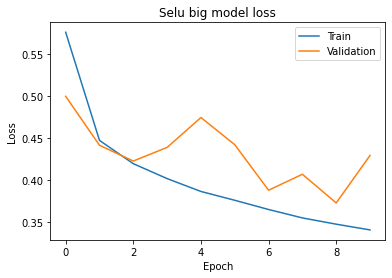

In [ ]:
plt.plot(selu_model_big_history.history['loss'])
plt.plot(selu_model_big_history.history['val_loss'])
plt.title('Selu big model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

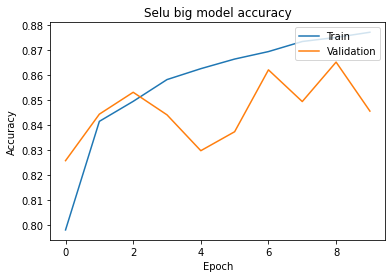

In [ ]:
plt.plot(selu_model_big_history.history['accuracy'])
plt.plot(selu_model_big_history.history['val_accuracy'])
plt.title('Selu big model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss is a little bit better with more neurons per layer, however, the validation loss is superior to the train loss earlier (from the 1st epoch instead of the 2nd) and at the 5th epoch, the gap between train and validation loss is the greatest of all the trained models which can denote a bit of overfitting

Bonus : train a big network (more than 5 layers). Does it overfit or has it still good performance ? 

In [ ]:
# Model with 10 layers and SeLu activation function
selu_model_very_big = Sequential()
selu_model_very_big.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
selu_model_very_big.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
selu_model_very_big_history = selu_model_very_big.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_very_big_history

Epoch 1/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.5703 - accuracy: 0.8041

Train Loss = 0.57023024559021
Validation Loss = 0.4685130715370178
Epoch =  0

1313/1313 [==============================] - 46s 35ms/step - loss: 0.5702 - accuracy: 0.8041 - val_loss: 0.4685 - val_accuracy: 0.8257
Epoch 2/10
1313/1313 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.8572

Train Loss = 0.3844323754310608
Validation Loss = 0.4344327747821808
Epoch =  1

1313/1313 [==============================] - 45s 34ms/step - loss: 0.3844 - accuracy: 0.8572 - val_loss: 0.4344 - val_accuracy: 0.8477
Epoch 3/10
1313/1313 [==============================] - ETA: 0s - loss: 0.3341 - accuracy: 0.8755

Train Loss = 0.3340628743171692
Validation Loss = 0.3656393587589264
Epoch =  2

1313/1313 [==============================] - 45s 34ms/step - loss: 0.3341 - accuracy: 0.8755 - val_loss: 0.3656 - val_accuracy: 0.8648
Epoch 4/10
1312/1313 [============================>.] - E

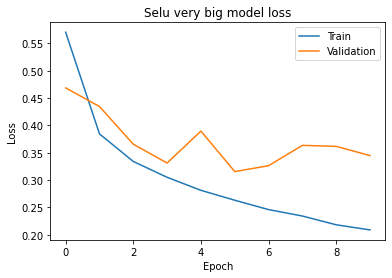

In [ ]:
plt.plot(selu_model_very_big_history.history['loss'])
plt.plot(selu_model_very_big_history.history['val_loss'])
plt.title('Selu very big model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

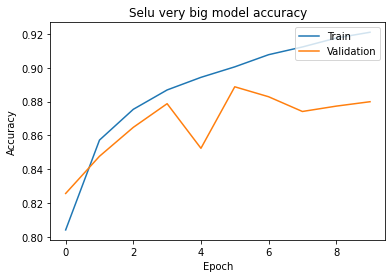

In [ ]:
plt.plot(selu_model_very_big_history.history['accuracy'])
plt.plot(selu_model_very_big_history.history['val_accuracy'])
plt.title('Selu very big model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Here the loss is worst than the previous model with only 5 layers and the same activation function and we can note more overfitting with the validation loss having a bigger gap with the train loss, however, the loss values are still better than for the sigmoid function activation model. The accuracy values also seem a bit better

## Effect of the parameter initialization 

The way the parameters of a network are initialized can have a great impact on the training process. 



Create a model with the same structure as the previous section. Loop over all layers and put all initial weight values to 0 (cf https://keras.io/api/layers/initializers/)

In [ ]:
from tensorflow.keras import initializers

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
initializer = tf.keras.initializers.Zeros()
new_selu_model_layers = new_selu_model.layers
for layer in new_selu_model_layers:
    layer.kernel_initializer = kernel_initializer=initializer
    layer.build(layer.input_shape) # forces layer update with new initializer, otherwise it will not update weights to 0

In [ ]:
new_selu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
# Checking for correct layer initialization with weights at 0
layers = new_selu_model.layers
for layer in layers:
  print(layer.get_weights(), layer.kernel_initializer)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

Train the model on the dataset and display the values. Are you shocked ? 

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
new_selu_model_history

Epoch 1/10
1311/1313 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0982

Train Loss = 2.3026764392852783
Validation Loss = 2.3027470111846924
Epoch =  0

1313/1313 [==============================] - 17s 13ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0971
Epoch 2/10
1309/1313 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.1008

Train Loss = 2.302657127380371
Validation Loss = 2.3027477264404297
Epoch =  1

1313/1313 [==============================] - 16s 12ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0971
Epoch 3/10
1312/1313 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0982

Train Loss = 2.302661180496216
Validation Loss = 2.3027679920196533
Epoch =  2

1313/1313 [==============================] - 16s 12ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0971
Epoch 4/10
1311/1313 [============================>.] - E

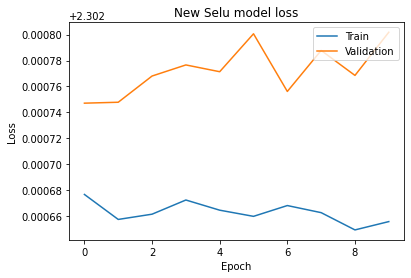

In [ ]:
plt.plot(new_selu_model_history.history['loss'])
plt.plot(new_selu_model_history.history['val_loss'])
plt.title('New Selu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

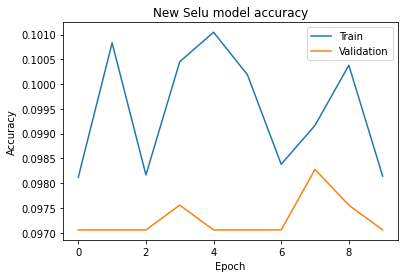

In [ ]:
plt.plot(new_selu_model_history.history['accuracy'])
plt.plot(new_selu_model_history.history['val_accuracy'])
plt.title('New Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss is constantly around 2.303, which is not surprising as we've initialized all weights to 0, which means all outputs will remain at the bias value (which has been applied here the SeLu activation function) for each layer, which produces the same loss and will result in the output of the first layer as the final output. The accuracy is also terrible here

## Effect of the optimizer

This time we want to study the effect of the optimization process on the network 


Instanciate the Optimizer SGD with a learning rate equaling to 0.1 and train the model 

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
new_selu_model_history

Epoch 1/10
1310/1313 [============================>.] - ETA: 0s - loss: 18.2765 - accuracy: 0.5098

Train Loss = 18.25746726989746
Validation Loss = 11.434158325195312
Epoch =  0

1313/1313 [==============================] - 17s 12ms/step - loss: 18.2575 - accuracy: 0.5102 - val_loss: 11.4342 - val_accuracy: 0.6938
Epoch 2/10
1313/1313 [==============================] - ETA: 0s - loss: 5.7245 - accuracy: 0.6950

Train Loss = 5.724505424499512
Validation Loss = 3.675302028656006
Epoch =  1

1313/1313 [==============================] - 16s 12ms/step - loss: 5.7245 - accuracy: 0.6950 - val_loss: 3.6753 - val_accuracy: 0.7727
Epoch 3/10
1311/1313 [============================>.] - ETA: 0s - loss: 3.6457 - accuracy: 0.7512

Train Loss = 3.647031307220459
Validation Loss = 12.113249778747559
Epoch =  2

1313/1313 [==============================] - 16s 12ms/step - loss: 3.6470 - accuracy: 0.7512 - val_loss: 12.1132 - val_accuracy: 0.6741
Epoch 4/10
1309/1313 [============================>.] -

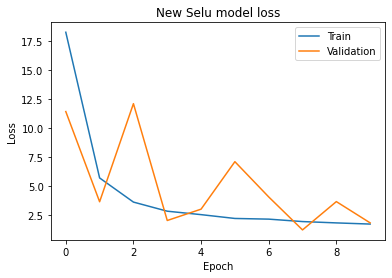

In [ ]:
plt.plot(new_selu_model_history.history['loss'])
plt.plot(new_selu_model_history.history['val_loss'])
plt.title('New Selu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

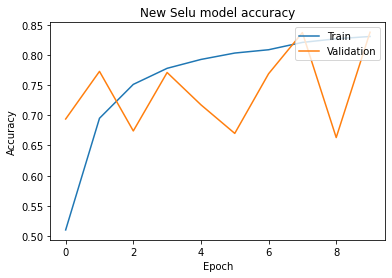

In [ ]:
plt.plot(new_selu_model_history.history['accuracy'])
plt.plot(new_selu_model_history.history['val_accuracy'])
plt.title('New Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Do the same with a learning rate of 0.01

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
new_selu_model_history

Epoch 1/10
1309/1313 [============================>.] - ETA: 0s - loss: 0.5786 - accuracy: 0.7971

Train Loss = 0.5785651803016663
Validation Loss = 0.4808866083621979
Epoch =  0

1313/1313 [==============================] - 18s 14ms/step - loss: 0.5786 - accuracy: 0.7970 - val_loss: 0.4809 - val_accuracy: 0.8253
Epoch 2/10
1311/1313 [============================>.] - ETA: 0s - loss: 0.4505 - accuracy: 0.8407

Train Loss = 0.45032551884651184
Validation Loss = 0.483048677444458
Epoch =  1

1313/1313 [==============================] - 20s 15ms/step - loss: 0.4503 - accuracy: 0.8406 - val_loss: 0.4830 - val_accuracy: 0.8321
Epoch 3/10
1311/1313 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8507

Train Loss = 0.419790118932724
Validation Loss = 0.4297320544719696
Epoch =  2

1313/1313 [==============================] - 17s 13ms/step - loss: 0.4198 - accuracy: 0.8507 - val_loss: 0.4297 - val_accuracy: 0.8499
Epoch 4/10
1310/1313 [============================>.] - 

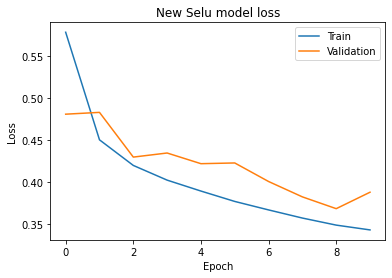

In [ ]:
plt.plot(new_selu_model_history.history['loss'])
plt.plot(new_selu_model_history.history['val_loss'])
plt.title('New Selu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

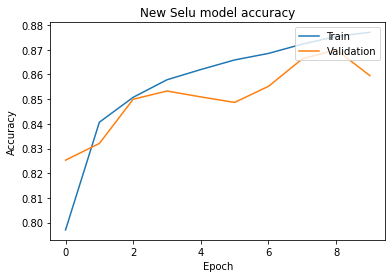

In [ ]:
plt.plot(new_selu_model_history.history['accuracy'])
plt.plot(new_selu_model_history.history['val_accuracy'])
plt.title('New Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Do the same with a learning rate of 0.9. Does it still work ? 

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.9)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
new_selu_model_history

Epoch 1/10
1313/1313 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0998

Train Loss = nan
Validation Loss = nan
Epoch =  0

1313/1313 [==============================] - 17s 13ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1008
Epoch 2/10
1310/1313 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0996

Train Loss = nan
Validation Loss = nan
Epoch =  1

1313/1313 [==============================] - 17s 13ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 3/10
1312/1313 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0997

Train Loss = nan
Validation Loss = nan
Epoch =  2

1313/1313 [==============================] - 16s 12ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 4/10
1313/1313 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0996

Train Loss = nan
Validation Loss = nan
Epoch =  3

1313/1313 [==============

The loss seems "broken" with nan values and the accuracy is very weak

Use the callback Reduce learning rate on plateau (https://keras.io/api/callbacks/reduce_lr_on_plateau/) and start with a pretty high learning rate. Is the learning faster ?


In [ ]:
initial_learning_rate = 0.7
min_learning_rate = 0.01

In [ ]:
# We configure it to reduce the learning rate to the min immediatly after each epoch
# when the accuracy does not improve.
# Validation accuracy is monitored here instead of the loss because the loss takes either a veeeery big value 
# or nan when it's too big for an int.
# Here we aim to directly attain the min learning rate of 0.01 that seemed pretty performant before
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=min_learning_rate/initial_learning_rate, patience=0, min_lr=min_learning_rate, min_delta=0)

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback(), reduce_lr])
new_selu_model_history

Epoch 1/10
1312/1313 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0998

Train Loss = nan
Validation Loss = nan
Epoch =  0

1313/1313 [==============================] - 14s 10ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1008 - lr: 0.7000
Epoch 2/10
1311/1313 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0996

Train Loss = nan
Validation Loss = nan
Epoch =  1

1313/1313 [==============================] - 13s 10ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008 - lr: 0.7000
Epoch 3/10
1312/1313 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0996

Train Loss = nan
Validation Loss = nan
Epoch =  2

1313/1313 [==============================] - 13s 10ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008 - lr: 0.0100
Epoch 4/10
1311/1313 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.0997

Train Loss = nan
Validation Loss = na

It seems like a bad learning rate configured at first won't be fixed by reducing it 

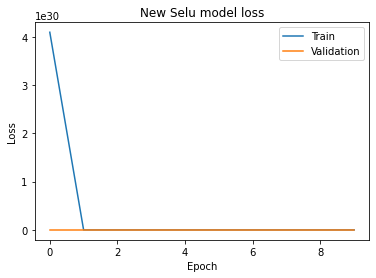

In [ ]:
plt.plot(new_selu_model_history.history['loss'])
plt.plot(new_selu_model_history.history['val_loss'])
plt.title('New Selu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

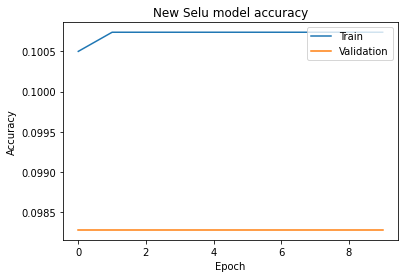

In [ ]:
plt.plot(new_selu_model_history.history['accuracy'])
plt.plot(new_selu_model_history.history['val_accuracy'])
plt.title('New Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Bonus : with the https://keras.io/api/callbacks/learning_rate_scheduler/ 

Implement the cyclical learning rate schema as follow (from "Cyclical Learning Rates for Training Neural Networks" Smith - https://arxiv.org/abs/1506.01186)

![image-2.png](attachment:image-2.png)

### Setting the cycle length

The paper suggests that we set the stepsize to "2 - 10 times the number of iterations in an epoch". The default batchsize of Keras being 32 and having 60 000 images, we will have 60 000 / 32 = 1875 iterations per epoch. Also, in the example provided in the paper, the iteration count was 500 and the stepsize set was 2000 which means the chosen factor was 4, which will also be chosen here accordingly

In [ ]:
# Getting base iteration count
DEFAULT_BATCHSIZE = 32
STEP_SIZE_FACTOR = 4
iteration_count = X_train.shape[0] /  DEFAULT_BATCHSIZE
print('iteration_count : ', iteration_count)

# Getting stepsize and cycle iteration count
step_size = STEP_SIZE_FACTOR * iteration_count
cycle_length = step_size * 2
print('cycle_length :', cycle_length, 'iterations | step_size : ', step_size)

# Getting max train epoch count accordingly
epochs_per_cycle = cycle_length / iteration_count
print('epochs per cycle : ', epochs_per_cycle)

iteration_count :  1875.0
cycle_length : 15000.0 iterations | step_size :  7500.0
epochs per cycle :  8.0


As the paper stated : "it is best to stop training at the end of a cycle, which is when the learning rate is at the minimum value and the accuracy peaks", which means we will only train the model for 8 epochs as each cycle will be comprised of 8 epochs

### Learning rate range test

We are using the "rule of the thumb" which is described in the paper as "setting base_lr to 1/3 or 1/4 of max_lr"

In [ ]:
base_lr = 0.05
max_lr = 0.2

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=base_lr)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

lr_metric = get_lr_metric(opt)

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', lr_metric])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
def scheduler(epoch, lr):
  if epoch == 0:
    return lr
  else:
    return lr + 0.05

In [ ]:
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=4, callbacks=[scheduler_callback])
new_selu_model_history

Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5462 - accuracy: 0.8097 - lr: 0.0500
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4937 - accuracy: 0.8255 - lr: 0.1000
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5002 - accuracy: 0.8267 - lr: 0.1500
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 67103518720.0000 - accuracy: 0.1219 - lr: 0.2000


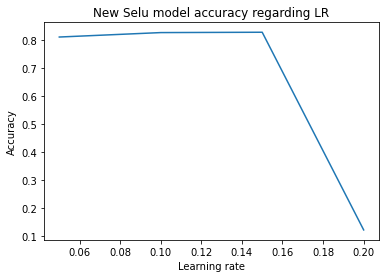

In [ ]:
plt.plot(new_selu_model_history.history['lr'], new_selu_model_history.history['accuracy'])
plt.title('New Selu model accuracy regarding LR')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()

The accuracy drops drastically from a learning rate of 0.15 along with a drastically increased loss. We will study this decrease in more details with more epochs. Also, we will reset min_lr to a lower value as the accuracy here seems to become stagnant from this lower bound value

&nbsp;

*Remark* : Multiple learning rate ranges were tried before getting to this one by simply increasing the max LR (and the min LR accordingly) at each attempt as long as the accuracy was improving 

In [ ]:
base_lr = 0.02
max_lr = 0.2

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=base_lr)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', lr_metric])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
def scheduler(epoch, lr):
  if epoch == 0:
    return lr
  else:
    return lr + 0.02

In [ ]:
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=10, callbacks=[scheduler_callback])
new_selu_model_history

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5354 - accuracy: 0.8109 - lr: 0.0200
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4632 - accuracy: 0.8343 - lr: 0.0400
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4391 - accuracy: 0.8423 - lr: 0.0600
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4256 - accuracy: 0.8452 - lr: 0.0800
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4141 - accuracy: 0.8520 - lr: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4132 - accuracy: 0.8526 - lr: 0.1200
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 479948679633960960.0000 - accuracy: 0.4832 - lr: 0.1400
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4743451639808.0000 - accuracy: 0.1000 - lr: 0.1600
Epoch 9/10
1875/1875 [=============================

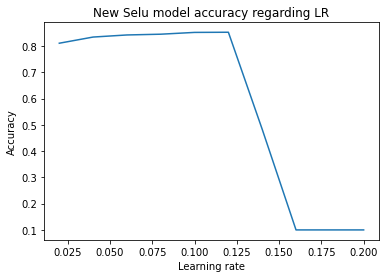

In [ ]:
plt.plot(new_selu_model_history.history['lr'], new_selu_model_history.history['accuracy'])
plt.title('New Selu model accuracy regarding LR')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()

We will set ```max_lr``` to **0.12** and continue searching for ```min_lr``` as the accuracy was still pretty stagnant. We will still take 10 epochs so base_lr will be first set to ```max_lr``` / 10 = 0.012

In [ ]:
base_lr = 0.012
max_lr = 0.12

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=base_lr)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', lr_metric])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
def scheduler(epoch, lr):
  if epoch == 0:
    return lr
  else:
    return lr + 0.012

In [ ]:
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=10, callbacks=[scheduler_callback])
new_selu_model_history

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5390 - accuracy: 0.8097 - lr: 0.0120
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4597 - accuracy: 0.8357 - lr: 0.0240
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4328 - accuracy: 0.8453 - lr: 0.0360
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4124 - accuracy: 0.8504 - lr: 0.0480
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3979 - accuracy: 0.8564 - lr: 0.0600
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3889 - accuracy: 0.8611 - lr: 0.0720
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3845 - accuracy: 0.8619 - lr: 0.0840
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3790 - accuracy: 0.8642 - lr: 0.0960
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.37

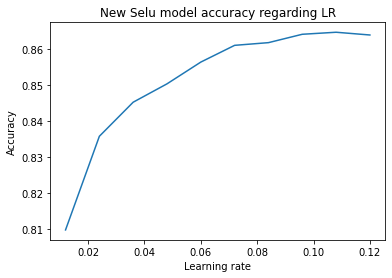

In [ ]:
plt.plot(new_selu_model_history.history['lr'], new_selu_model_history.history['accuracy'])
plt.title('New Selu model accuracy regarding LR')
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()

By following the paper's recommendations, ```min_lr``` will be equal to **0.012** and ```max_lr``` to **0.1080** as the accuracy started increasing from a learning rate of 0.02 and started decreasing from a learning rate of 0.1080

### Implementing the CLR (triangle version)

In [ ]:
min_lr = 0.012
max_lr = 0.1080

As the cycle length is equivalent to 8 epochs, the stepsize will be equivalent to 4 epochs

In [ ]:
lr_diff = max_lr - min_lr
lr_diff

0.096

The paper states that the max learning rate should be reached by the stepsize, therefore, the learning rate must be raised by 0.096 to reach 0.1080 at epoch 5, then decrease from 0.01080 to reach 0.012 at epoch 9 (as the peak of the triangle will be at epoch 5) 

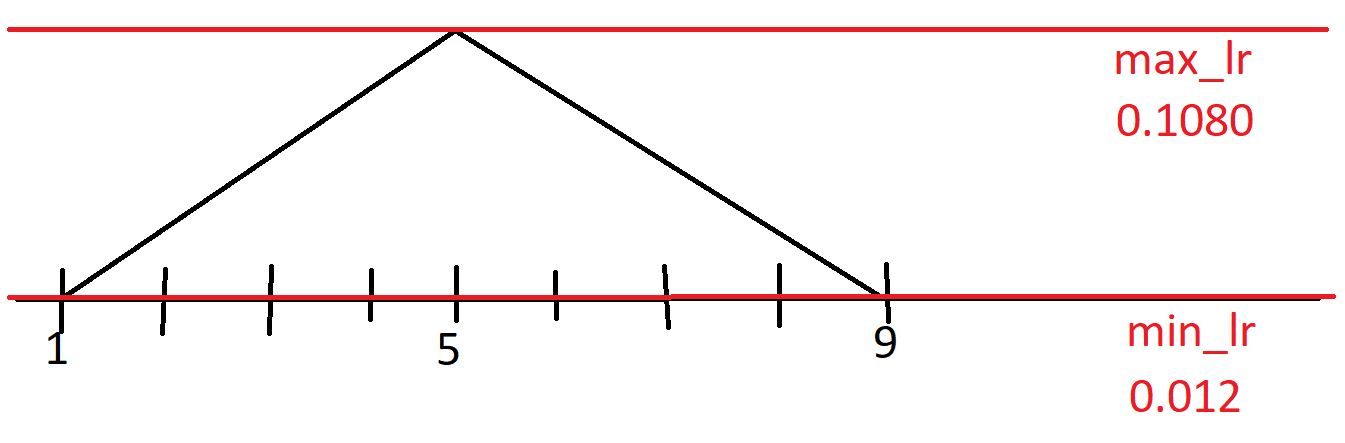

In [ ]:
# My beautiful Paint schema of what I am trying to implement
from IPython.display import Image
Image('implementation_schema.JPG')

In [ ]:
lr_bias = lr_diff / 4
lr_bias

0.024

The learning rate will be biased by 0.024 at each epoch (except for the first one which represents the min base learning rate

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=min_lr)

In [ ]:
new_selu_model = Sequential()
new_selu_model.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
new_selu_model.add(Dense(units=500, activation='selu'))
new_selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
new_selu_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy', lr_metric])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
def scheduler(epoch, lr):
  if epoch == 0:
    return lr
  elif epoch <= 4: # the 5th epoch has index 4
    return lr + lr_bias
  else:
    return lr - lr_bias

In [ ]:
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
new_selu_model_history = new_selu_model.fit(X_train, y_train, epochs=int(epochs_per_cycle + 1), callbacks=[scheduler_callback])
new_selu_model_history

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5387 - accuracy: 0.8097 - lr: 0.0120
Epoch 2/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4848 - accuracy: 0.8284 - lr: 0.0360
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4533 - accuracy: 0.8381 - lr: 0.0600
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4354 - accuracy: 0.8444 - lr: 0.0840
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4265 - accuracy: 0.8463 - lr: 0.1080
Epoch 6/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3535 - accuracy: 0.8706 - lr: 0.0840
Epoch 7/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3091 - accuracy: 0.8852 - lr: 0.0600
Epoch 8/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2748 - accuracy: 0.8987 - lr: 0.0360
Epoch 9/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2456 - accu

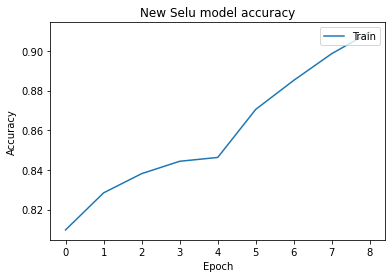

In [ ]:
plt.plot(new_selu_model_history.history['accuracy'])
plt.title('New Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

The peak accuracy reached is 0.9095 at the end of the cycle

Bonus : do the study activation function and size on a more complexe dataset like cifar 10

Load the cifar 10 dataset from the tensorflow.keras.datasets module 

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data

data = load_data()
train, test = data

Display the first image of the train dataset with matplotlib

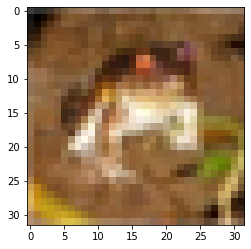

In [ ]:
import matplotlib.pyplot as plt

X_train, y_train = train
plt.imshow(X_train[0])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

Display the number of classes in the dataset

In [ ]:
import numpy as np
X_test, y_test = test
class_values = np.unique(data[0][1]) # or else len(set(y_train))
class_count = len(np.array(class_values))
class_count, class_values

(10, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Create a simple neural network with the following structure : 

- One dense layer with **sigmoid** activation and 300 neurones
- One dense layer with **sigmoid** activation and 100 neurones 
- One dense layer with softmax activation. How many neurones should there be ? 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
images_count, image_height, image_width, color_count = X_train.shape

In [ ]:
sigmoid_model = Sequential()
sigmoid_model.add(Dense(units=300, activation='sigmoid', input_shape=[image_height*image_width*color_count]))
sigmoid_model.add(Dense(units=100, activation='sigmoid'))
sigmoid_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

Compile the model with the sgd optimizer and the sparse_categorical_crossentropy_loss

In [ ]:
sigmoid_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

Reshape the images so that each image is a vector. Remember to normalize the dataset by doing a min-max scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = X_train.reshape(-1, image_height*image_width*color_count)
X_train = scaler.fit_transform(X_train) # or X_train / 255 as min = 0 and max = 255 (RGB colors)

Train the model for 10 epochs and display the loss versus the number of epochs. For that you can use Keras callbacks : https://keras.io/api/callbacks/

Does it train well ? 

In [ ]:
import tensorflow as tf

class LogCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('\n\nTrain Loss = {}\nValidation Loss = {}\nEpoch =  {}\n'.format(logs['loss'], logs['val_loss'], epoch))

In [ ]:
sigmoid_model_history = sigmoid_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
sigmoid_model_history

Epoch 1/10
1088/1094 [============================>.] - ETA: 0s - loss: 2.2644 - accuracy: 0.1784

Train Loss = 2.2642126083374023
Validation Loss = 2.2146217823028564
Epoch =  0

1094/1094 [==============================] - 6s 5ms/step - loss: 2.2642 - accuracy: 0.1786 - val_loss: 2.2146 - val_accuracy: 0.2357
Epoch 2/10
1083/1094 [============================>.] - ETA: 0s - loss: 2.1578 - accuracy: 0.2524

Train Loss = 2.15725040435791
Validation Loss = 2.103273630142212
Epoch =  1

1094/1094 [==============================] - 5s 5ms/step - loss: 2.1573 - accuracy: 0.2527 - val_loss: 2.1033 - val_accuracy: 0.2702
Epoch 3/10
1090/1094 [============================>.] - ETA: 0s - loss: 2.0583 - accuracy: 0.2827

Train Loss = 2.058382272720337
Validation Loss = 2.023690700531006
Epoch =  2

1094/1094 [==============================] - 5s 5ms/step - loss: 2.0584 - accuracy: 0.2828 - val_loss: 2.0237 - val_accuracy: 0.3006
Epoch 4/10
1084/1094 [============================>.] - ETA: 0s - 

The loss did not go under 1.8 with the sigmoid activation function, however, both train and validation loss are decreasing at each epoch

Make another model by replacing this time the sigmoid activations by Relu. Train again the model and display the loss curve. Is it better ? 

In [ ]:
relu_model = Sequential()
relu_model.add(Dense(units=300, activation='relu', input_shape=[image_height*image_width*color_count]))
relu_model.add(Dense(units=100, activation='relu'))
relu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
relu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
relu_model_history = relu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
relu_model_history

Epoch 1/10
1085/1094 [============================>.] - ETA: 0s - loss: 1.9193 - accuracy: 0.3122

Train Loss = 1.917891502380371
Validation Loss = 1.8669315576553345
Epoch =  0

1094/1094 [==============================] - 6s 5ms/step - loss: 1.9179 - accuracy: 0.3127 - val_loss: 1.8669 - val_accuracy: 0.3312
Epoch 2/10
1084/1094 [============================>.] - ETA: 0s - loss: 1.7375 - accuracy: 0.3870

Train Loss = 1.7370264530181885
Validation Loss = 1.7003533840179443
Epoch =  1

1094/1094 [==============================] - 5s 5ms/step - loss: 1.7370 - accuracy: 0.3874 - val_loss: 1.7004 - val_accuracy: 0.4003
Epoch 3/10
1093/1094 [============================>.] - ETA: 0s - loss: 1.6575 - accuracy: 0.4144

Train Loss = 1.6574759483337402
Validation Loss = 1.7025153636932373
Epoch =  2

1094/1094 [==============================] - 5s 5ms/step - loss: 1.6575 - accuracy: 0.4143 - val_loss: 1.7025 - val_accuracy: 0.3889
Epoch 4/10
1083/1094 [============================>.] - ETA: 0

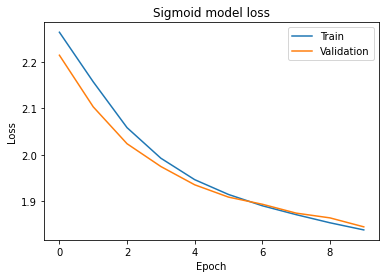

In [ ]:
plt.plot(sigmoid_model_history.history['loss'])
plt.plot(sigmoid_model_history.history['val_loss'])
plt.title('Sigmoid model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

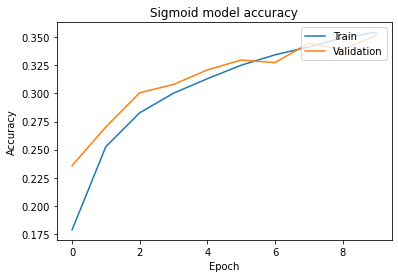

In [ ]:
plt.plot(sigmoid_model_history.history['accuracy'])
plt.plot(sigmoid_model_history.history['val_accuracy'])
plt.title('Sigmoid model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

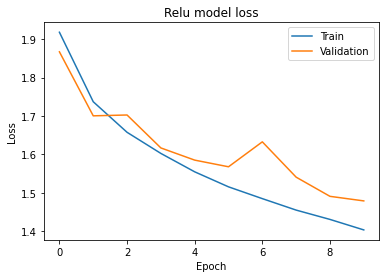

In [ ]:
plt.plot(relu_model_history.history['loss'])
plt.plot(relu_model_history.history['val_loss'])
plt.title('Relu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

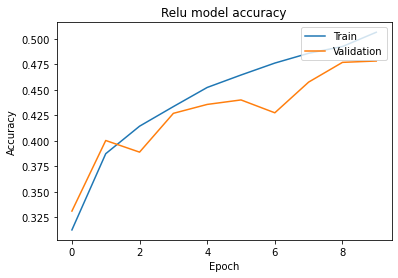

In [ ]:
plt.plot(relu_model_history.history['accuracy'])
plt.plot(relu_model_history.history['val_accuracy'])
plt.title('Relu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

For the RELu model, the loss did go under 1.4 and was globally inferior to the loss with the sigmoid activation function but we note that the validation loss increases after the 4th epoch and then is a little bit superior to the train loss until the 10th epoch, but it still does better than the model with the sigmoid activation function. Also, in terms of accuracy, the Relu model is a little better than the sigmoid but still both have relatively bad performances on the CIFAR 10 dataset.

Do the same with the selu function 

In [ ]:
selu_model = Sequential()
selu_model.add(Dense(units=300, activation='selu', input_shape=[image_height*image_width*color_count]))
selu_model.add(Dense(units=100, activation='selu'))
selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
selu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
selu_model_history = selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_history

Epoch 1/10
1091/1094 [============================>.] - ETA: 0s - loss: 1.9606 - accuracy: 0.3024

Train Loss = 1.9602080583572388
Validation Loss = 1.8557606935501099
Epoch =  0

1094/1094 [==============================] - 6s 5ms/step - loss: 1.9602 - accuracy: 0.3026 - val_loss: 1.8558 - val_accuracy: 0.3268
Epoch 2/10
1082/1094 [============================>.] - ETA: 0s - loss: 1.7508 - accuracy: 0.3757

Train Loss = 1.750859022140503
Validation Loss = 1.7744600772857666
Epoch =  1

1094/1094 [==============================] - 5s 5ms/step - loss: 1.7509 - accuracy: 0.3758 - val_loss: 1.7745 - val_accuracy: 0.3694
Epoch 3/10
1089/1094 [============================>.] - ETA: 0s - loss: 1.6670 - accuracy: 0.4095

Train Loss = 1.6667146682739258
Validation Loss = 1.7713677883148193
Epoch =  2

1094/1094 [==============================] - 5s 5ms/step - loss: 1.6667 - accuracy: 0.4095 - val_loss: 1.7714 - val_accuracy: 0.3659
Epoch 4/10
1093/1094 [============================>.] - ETA: 0

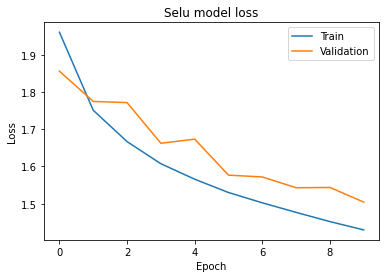

In [ ]:
plt.plot(selu_model_history.history['loss'])
plt.plot(selu_model_history.history['val_loss'])
plt.title('Selu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

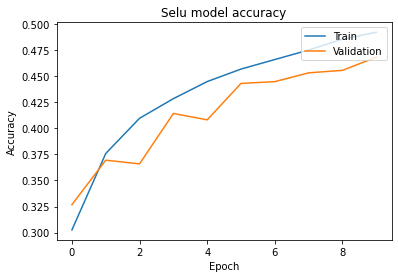

In [ ]:
plt.plot(selu_model_history.history['accuracy'])
plt.plot(selu_model_history.history['val_accuracy'])
plt.title('Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss of the model with the SeLu activation function is not really better than the model with the ReLu activation function

Effect of the size 

In this section we want to study the effect of the size of the network on the learning

Re-use the previous network and try to increase its size by using the following number of neurones : 

-  800 for first layer
- 500 for second layer
- same size


You might need to train the network longer, but does it reach a better performance ? 

In [ ]:
selu_model_big = Sequential()
selu_model_big.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width*color_count]))
selu_model_big.add(Dense(units=500, activation='selu'))
selu_model_big.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
selu_model_big.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
selu_model_big_history = selu_model_big.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_big_history

Epoch 1/10
1088/1094 [============================>.] - ETA: 0s - loss: 2.0863 - accuracy: 0.2995

Train Loss = 2.085036516189575
Validation Loss = 1.7946707010269165
Epoch =  0

1094/1094 [==============================] - 8s 7ms/step - loss: 2.0850 - accuracy: 0.2998 - val_loss: 1.7947 - val_accuracy: 0.3609
Epoch 2/10
1092/1094 [============================>.] - ETA: 0s - loss: 1.7393 - accuracy: 0.3786

Train Loss = 1.7393956184387207
Validation Loss = 1.7746665477752686
Epoch =  1

1094/1094 [==============================] - 7s 7ms/step - loss: 1.7394 - accuracy: 0.3786 - val_loss: 1.7747 - val_accuracy: 0.3731
Epoch 3/10
1085/1094 [============================>.] - ETA: 0s - loss: 1.6518 - accuracy: 0.4120

Train Loss = 1.651911973953247
Validation Loss = 1.7773889303207397
Epoch =  2

1094/1094 [==============================] - 6s 6ms/step - loss: 1.6519 - accuracy: 0.4118 - val_loss: 1.7774 - val_accuracy: 0.3647
Epoch 4/10
1087/1094 [============================>.] - ETA: 0s

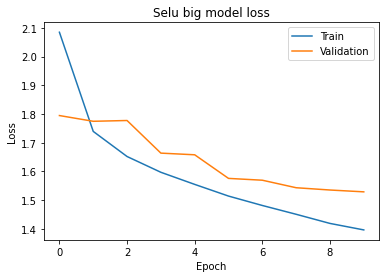

In [ ]:
plt.plot(selu_model_big_history.history['loss'])
plt.plot(selu_model_big_history.history['val_loss'])
plt.title('Selu big model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

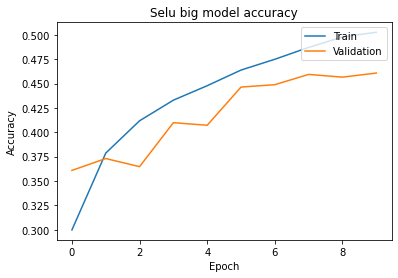

In [ ]:
plt.plot(selu_model_big_history.history['accuracy'])
plt.plot(selu_model_big_history.history['val_accuracy'])
plt.title('Selu big model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss is a little bit better with more neurons per layer, however, the validation loss is superior to the train loss earlier (from the 1st epoch instead of the 2nd) and at the 5th epoch, the gap between train and validation loss is not that big

Bonus : train a big network (more than 5 layers). Does it overfit or has it still good performance ? 

In [ ]:
# Model with 10 layers and SeLu activation function
selu_model_very_big = Sequential()
selu_model_very_big.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width*color_count]))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [ ]:
selu_model_very_big.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [ ]:
selu_model_very_big_history = selu_model_very_big.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_very_big_history

Epoch 1/10
1093/1094 [============================>.] - ETA: 0s - loss: 2.5459 - accuracy: 0.2562

Train Loss = 2.545462131500244
Validation Loss = 1.807705044746399
Epoch =  0

1094/1094 [==============================] - 11s 10ms/step - loss: 2.5455 - accuracy: 0.2562 - val_loss: 1.8077 - val_accuracy: 0.3525
Epoch 2/10
1087/1094 [============================>.] - ETA: 0s - loss: 1.7328 - accuracy: 0.3764

Train Loss = 1.7321298122406006
Validation Loss = 1.7238149642944336
Epoch =  1

1094/1094 [==============================] - 9s 9ms/step - loss: 1.7321 - accuracy: 0.3767 - val_loss: 1.7238 - val_accuracy: 0.3726
Epoch 3/10
1090/1094 [============================>.] - ETA: 0s - loss: 1.5969 - accuracy: 0.4258

Train Loss = 1.596635103225708
Validation Loss = 1.6055163145065308
Epoch =  2

1094/1094 [==============================] - 10s 9ms/step - loss: 1.5966 - accuracy: 0.4259 - val_loss: 1.6055 - val_accuracy: 0.4263
Epoch 4/10
1093/1094 [============================>.] - ETA: 

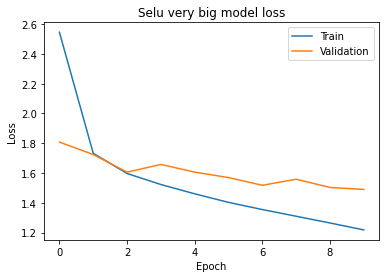

In [ ]:
plt.plot(selu_model_very_big_history.history['loss'])
plt.plot(selu_model_very_big_history.history['val_loss'])
plt.title('Selu very big model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

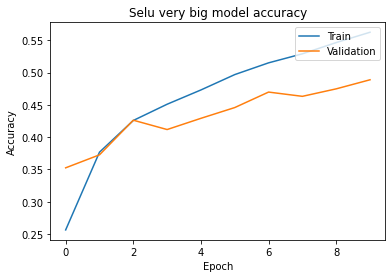

In [ ]:
plt.plot(selu_model_very_big_history.history['accuracy'])
plt.plot(selu_model_very_big_history.history['val_accuracy'])
plt.title('Selu very big model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Here the loss is better than the previous model with only 5 layers and the same activation function and we can note a little less overfitting. The accuracy values also seem a bit better. However, globally the performances on the CIFAR 10 dataset are worse than those on the fashion MNIST dataset, probably because this time the images are colored

Bonus : do the same with a small convolutional network

Effect of the activation function

Load the fashion mnist dataset from the tensorflow.keras.datasets module 

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data

data = load_data()

data = load_data()
train, test = data

170508288/170498071 [==============================] - 8s 0us/step


Display the first image of the train dataset with matplotlib

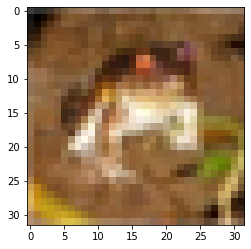

In [2]:
import matplotlib.pyplot as plt

X_train, y_train = train
plt.imshow(X_train[0])

In [3]:
X_train.shape

(50000, 32, 32, 3)

Display the number of classes in the dataset

In [4]:
import numpy as np
X_test, y_test = test
class_values = np.unique(data[0][1]) # or else len(set(y_train))
class_count = len(np.array(class_values))
class_count, class_values

(10, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Create a simple neural network with the following structure : 

- One convolutional layer with **sigmoid** activation and 32 neurones
- One dense layer with **sigmoid** activation and 300 neurones
- One dense layer with **sigmoid** activation and 100 neurones 
- One dense layer with softmax activation. How many neurones should there be ? 

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [9]:
images_count, image_height, image_width, color_count = X_train.shape

In [11]:
sigmoid_model = Sequential()
sigmoid_model.add(Conv2D(32, activation='sigmoid', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
sigmoid_model.add(Flatten())
sigmoid_model.add(Dense(units=300, activation='sigmoid'))
sigmoid_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

Compile the model with the sgd optimizer and the sparse_categorical_crossentropy_loss

In [12]:
sigmoid_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

Normalize the dataset by doing a min-max scaling


In [13]:
X_train = X_train / 255
X_test = X_test / 255

Train the model for 10 epochs and display the loss versus the number of epochs. For that you can use Keras callbacks : https://keras.io/api/callbacks/

Does it train well ? 

In [14]:
import tensorflow as tf

class LogCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('\n\nTrain Loss = {}\nValidation Loss = {}\nEpoch =  {}\n'.format(logs['loss'], logs['val_loss'], epoch))

In [15]:
sigmoid_model_history = sigmoid_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
sigmoid_model_history

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 2.2900 - accuracy: 0.1275

Train Loss = 2.2900149822235107
Validation Loss = 2.2114627361297607
Epoch =  0

1094/1094 [==============================] - 19s 10ms/step - loss: 2.2900 - accuracy: 0.1275 - val_loss: 2.2115 - val_accuracy: 0.1575
Epoch 2/10
1089/1094 [============================>.] - ETA: 0s - loss: 2.1370 - accuracy: 0.2090

Train Loss = 2.136801242828369
Validation Loss = 2.0649383068084717
Epoch =  1

1094/1094 [==============================] - 11s 10ms/step - loss: 2.1368 - accuracy: 0.2092 - val_loss: 2.0649 - val_accuracy: 0.2333
Epoch 3/10
1092/1094 [============================>.] - ETA: 0s - loss: 2.0295 - accuracy: 0.2563

Train Loss = 2.0294594764709473
Validation Loss = 1.9948537349700928
Epoch =  2

1094/1094 [==============================] - 10s 10ms/step - loss: 2.0295 - accuracy: 0.2562 - val_loss: 1.9949 - val_accuracy: 0.2745
Epoch 4/10
1092/1094 [============================>.] - 

The loss did not go under 1.7 with the sigmoid activation function, however, both train and validation loss are decreasing at each epoch

Make another model by replacing this time the sigmoid activations by Relu. Train again the model and display the loss curve. Is it better ? 

In [16]:
relu_model = Sequential()
relu_model.add(Conv2D(32, activation='relu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
relu_model.add(Flatten())
relu_model.add(Dense(units=300, activation='relu'))
relu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [17]:
relu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [18]:
relu_model_history = relu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
relu_model_history

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 1.8372 - accuracy: 0.3492

Train Loss = 1.83720862865448
Validation Loss = 1.7062830924987793
Epoch =  0

1094/1094 [==============================] - 10s 9ms/step - loss: 1.8372 - accuracy: 0.3492 - val_loss: 1.7063 - val_accuracy: 0.4077
Epoch 2/10
1088/1094 [============================>.] - ETA: 0s - loss: 1.5675 - accuracy: 0.4479

Train Loss = 1.5669376850128174
Validation Loss = 1.6036146879196167
Epoch =  1

1094/1094 [==============================] - 10s 9ms/step - loss: 1.5669 - accuracy: 0.4481 - val_loss: 1.6036 - val_accuracy: 0.4308
Epoch 3/10
1090/1094 [============================>.] - ETA: 0s - loss: 1.4238 - accuracy: 0.4985

Train Loss = 1.4234344959259033
Validation Loss = 1.4781972169876099
Epoch =  2

1094/1094 [==============================] - 11s 10ms/step - loss: 1.4234 - accuracy: 0.4988 - val_loss: 1.4782 - val_accuracy: 0.4836
Epoch 4/10
1089/1094 [============================>.] - ETA

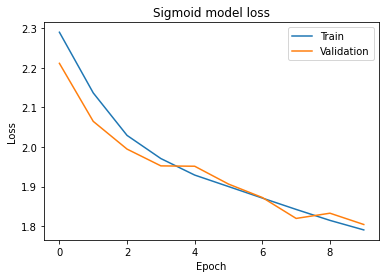

In [19]:
plt.plot(sigmoid_model_history.history['loss'])
plt.plot(sigmoid_model_history.history['val_loss'])
plt.title('Sigmoid model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

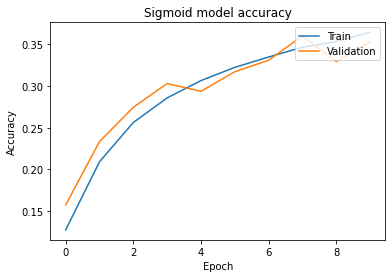

In [20]:
plt.plot(sigmoid_model_history.history['accuracy'])
plt.plot(sigmoid_model_history.history['val_accuracy'])
plt.title('Sigmoid model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

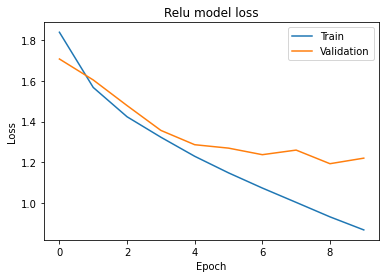

In [21]:
plt.plot(relu_model_history.history['loss'])
plt.plot(relu_model_history.history['val_loss'])
plt.title('Relu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

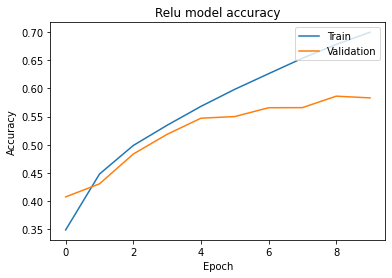

In [22]:
plt.plot(relu_model_history.history['accuracy'])
plt.plot(relu_model_history.history['val_accuracy'])
plt.title('Relu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

For the RELu model, the loss did go under 0.9 and was globally inferior the the loss with the sigmoid activation function but we note that the validation loss increases after the 4th epoch and then is a little bit superior to the train loss until the 10th epoch, but it still does better than the model with the sigmoid activation function. Also, in terms of accuracy, the Relu model is better than the sigmoid.

Do the same with the selu function 

In [23]:
selu_model = Sequential()
selu_model.add(Conv2D(32, activation='selu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
selu_model.add(Flatten())
selu_model.add(Dense(units=300, activation='selu'))
selu_model.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [24]:
selu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [25]:
selu_model_history = selu_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_history

Epoch 1/10
1092/1094 [============================>.] - ETA: 0s - loss: 1.8129 - accuracy: 0.3758

Train Loss = 1.812800407409668
Validation Loss = 1.719295620918274
Epoch =  0

1094/1094 [==============================] - 10s 9ms/step - loss: 1.8128 - accuracy: 0.3759 - val_loss: 1.7193 - val_accuracy: 0.4059
Epoch 2/10
1091/1094 [============================>.] - ETA: 0s - loss: 1.6448 - accuracy: 0.4266

Train Loss = 1.6446772813796997
Validation Loss = 1.6854071617126465
Epoch =  1

1094/1094 [==============================] - 10s 9ms/step - loss: 1.6447 - accuracy: 0.4266 - val_loss: 1.6854 - val_accuracy: 0.4178
Epoch 3/10
1092/1094 [============================>.] - ETA: 0s - loss: 1.5743 - accuracy: 0.4547

Train Loss = 1.5744837522506714
Validation Loss = 1.6592116355895996
Epoch =  2

1094/1094 [==============================] - 10s 9ms/step - loss: 1.5745 - accuracy: 0.4545 - val_loss: 1.6592 - val_accuracy: 0.4209
Epoch 4/10
1090/1094 [============================>.] - ETA:

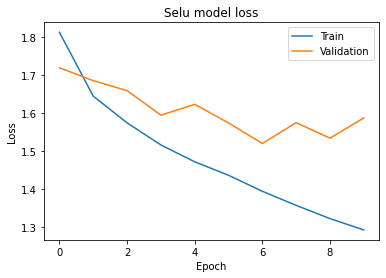

In [26]:
plt.plot(selu_model_history.history['loss'])
plt.plot(selu_model_history.history['val_loss'])
plt.title('Selu model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

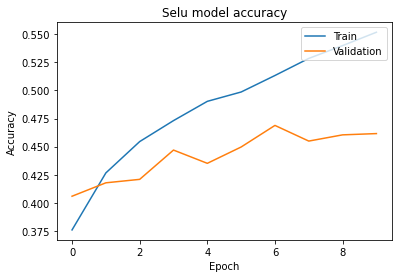

In [27]:
plt.plot(selu_model_history.history['accuracy'])
plt.plot(selu_model_history.history['val_accuracy'])
plt.title('Selu model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss of the model with the SeLu activation function is a bit better than the model with the ReLu activation function, however the accuracy seems to degrade over epochs for the validation set

## Effect of the size 

In this section we want to study the effect of the size of the network on the learning

Re-use the previous network and try to increase its size by using the following number of neurones for the Dense Layer : 

-  800 for first layer
- 500 for second layer
- same size

In the convolutional layer, we will put 64 neurons this time instead of 32.


You might need to train the network longer, but does it reach a better performance ? 

In [28]:
selu_model_big = Sequential()
selu_model_big.add(Conv2D(64, activation='selu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
selu_model_big.add(Flatten())
selu_model_big.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
selu_model_big.add(Dense(units=500, activation='selu'))
selu_model_big.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [29]:
selu_model_big.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [30]:
selu_model_big_history = selu_model_big.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_big_history

Epoch 1/10
1093/1094 [============================>.] - ETA: 0s - loss: 1.8314 - accuracy: 0.3788

Train Loss = 1.8311716318130493
Validation Loss = 1.67482590675354
Epoch =  0

1094/1094 [==============================] - 28s 25ms/step - loss: 1.8312 - accuracy: 0.3789 - val_loss: 1.6748 - val_accuracy: 0.4155
Epoch 2/10
1092/1094 [============================>.] - ETA: 0s - loss: 1.6016 - accuracy: 0.4452

Train Loss = 1.6012641191482544
Validation Loss = 1.622509479522705
Epoch =  1

1094/1094 [==============================] - 25s 23ms/step - loss: 1.6013 - accuracy: 0.4453 - val_loss: 1.6225 - val_accuracy: 0.4340
Epoch 3/10
1092/1094 [============================>.] - ETA: 0s - loss: 1.5180 - accuracy: 0.4713

Train Loss = 1.517879605293274
Validation Loss = 1.5862631797790527
Epoch =  2

1094/1094 [==============================] - 27s 25ms/step - loss: 1.5179 - accuracy: 0.4715 - val_loss: 1.5863 - val_accuracy: 0.4473
Epoch 4/10
1093/1094 [============================>.] - ETA

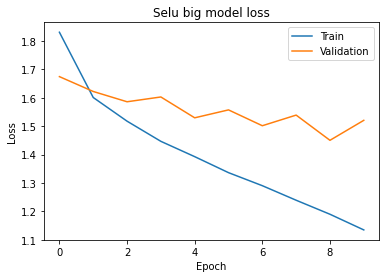

In [31]:
plt.plot(selu_model_big_history.history['loss'])
plt.plot(selu_model_big_history.history['val_loss'])
plt.title('Selu big model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

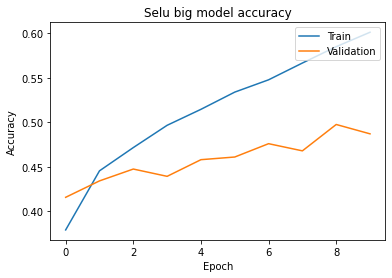

In [32]:
plt.plot(selu_model_big_history.history['accuracy'])
plt.plot(selu_model_big_history.history['val_accuracy'])
plt.title('Selu big model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The loss is not really better with more neurons here but the accuracy increased a little

Bonus : train a big network (more than 5 layers). Does it overfit or has it still good performance ? 

In [34]:
# Model with 13 layers and SeLu activation function
selu_model_very_big = Sequential()
selu_model_very_big.add(Conv2D(64, activation='selu', kernel_size=[3,3], input_shape=[image_height, image_width, color_count]))
selu_model_very_big.add(Conv2D(64, activation='selu', kernel_size=[3,3]))
selu_model_very_big.add(Flatten())
selu_model_very_big.add(Dense(units=800, activation='selu', input_shape=[image_height*image_width]))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=500, activation='selu'))
selu_model_very_big.add(Dense(units=class_count, activation='softmax')) # as many neurones as classes
# softmax normalizes the model's outputs so that it looks like a proba distribution with Sum(output_i) = 1

In [35]:
selu_model_very_big.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : used when class values are already one-hot-encoded
# sparse_categorical_crossentropy : used when class values are not already one-hot-encoded

In [36]:
selu_model_very_big_history = selu_model_very_big.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[LogCallback()])
selu_model_very_big_history

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 3.3206 - accuracy: 0.1697

Train Loss = 3.3205933570861816
Validation Loss = 2.134428024291992
Epoch =  0

1094/1094 [==============================] - 30s 27ms/step - loss: 3.3206 - accuracy: 0.1697 - val_loss: 2.1344 - val_accuracy: 0.2710
Epoch 2/10
1094/1094 [==============================] - ETA: 0s - loss: 1.7614 - accuracy: 0.3755

Train Loss = 1.7614014148712158
Validation Loss = 1.6713389158248901
Epoch =  1

1094/1094 [==============================] - 29s 27ms/step - loss: 1.7614 - accuracy: 0.3755 - val_loss: 1.6713 - val_accuracy: 0.4118
Epoch 3/10
1092/1094 [============================>.] - ETA: 0s - loss: 1.5010 - accuracy: 0.4614

Train Loss = 1.5006978511810303
Validation Loss = 1.5466684103012085
Epoch =  2

1094/1094 [==============================] - 29s 27ms/step - loss: 1.5007 - accuracy: 0.4615 - val_loss: 1.5467 - val_accuracy: 0.4577
Epoch 4/10
1093/1094 [============================>.] - 

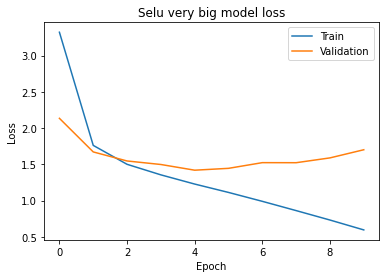

In [37]:
plt.plot(selu_model_very_big_history.history['loss'])
plt.plot(selu_model_very_big_history.history['val_loss'])
plt.title('Selu very big model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

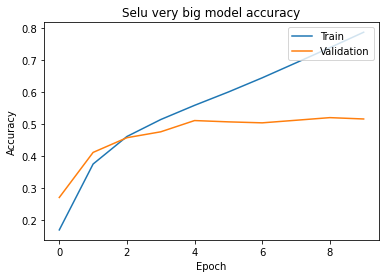

In [38]:
plt.plot(selu_model_very_big_history.history['accuracy'])
plt.plot(selu_model_very_big_history.history['val_accuracy'])
plt.title('Selu very big model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Here the loss is worst than the previous model with the same activation function. The accuracy values however seem a bit better